In [1]:
#upload the data
from google.colab import files
uploaded = files.upload()

Saving INF2178_A4_data.csv to INF2178_A4_data.csv


In [2]:
!pip install pingouin
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.formula.api import mixedlm
import scipy.stats as stats
import pingouin as pg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 4.1 MB/s eta 0:00:00


In [3]:
#check the data
df = pd.read_csv("INF2178_A4_data.csv")
df.head()

,Unnamed: 0,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444


In [4]:
df.shape

(294, 16)

In [5]:
#check the null
df.isna().sum()

Unnamed: 0     0
Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           15
MMSE           1
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

In [6]:
# Imputing missing values with the median of each column
df['SES'] = df['SES'].fillna(df['SES'].median())
df['MMSE'] = df['MMSE'].fillna(df['MMSE'].median())
df.isna().sum()

Unnamed: 0    0
Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

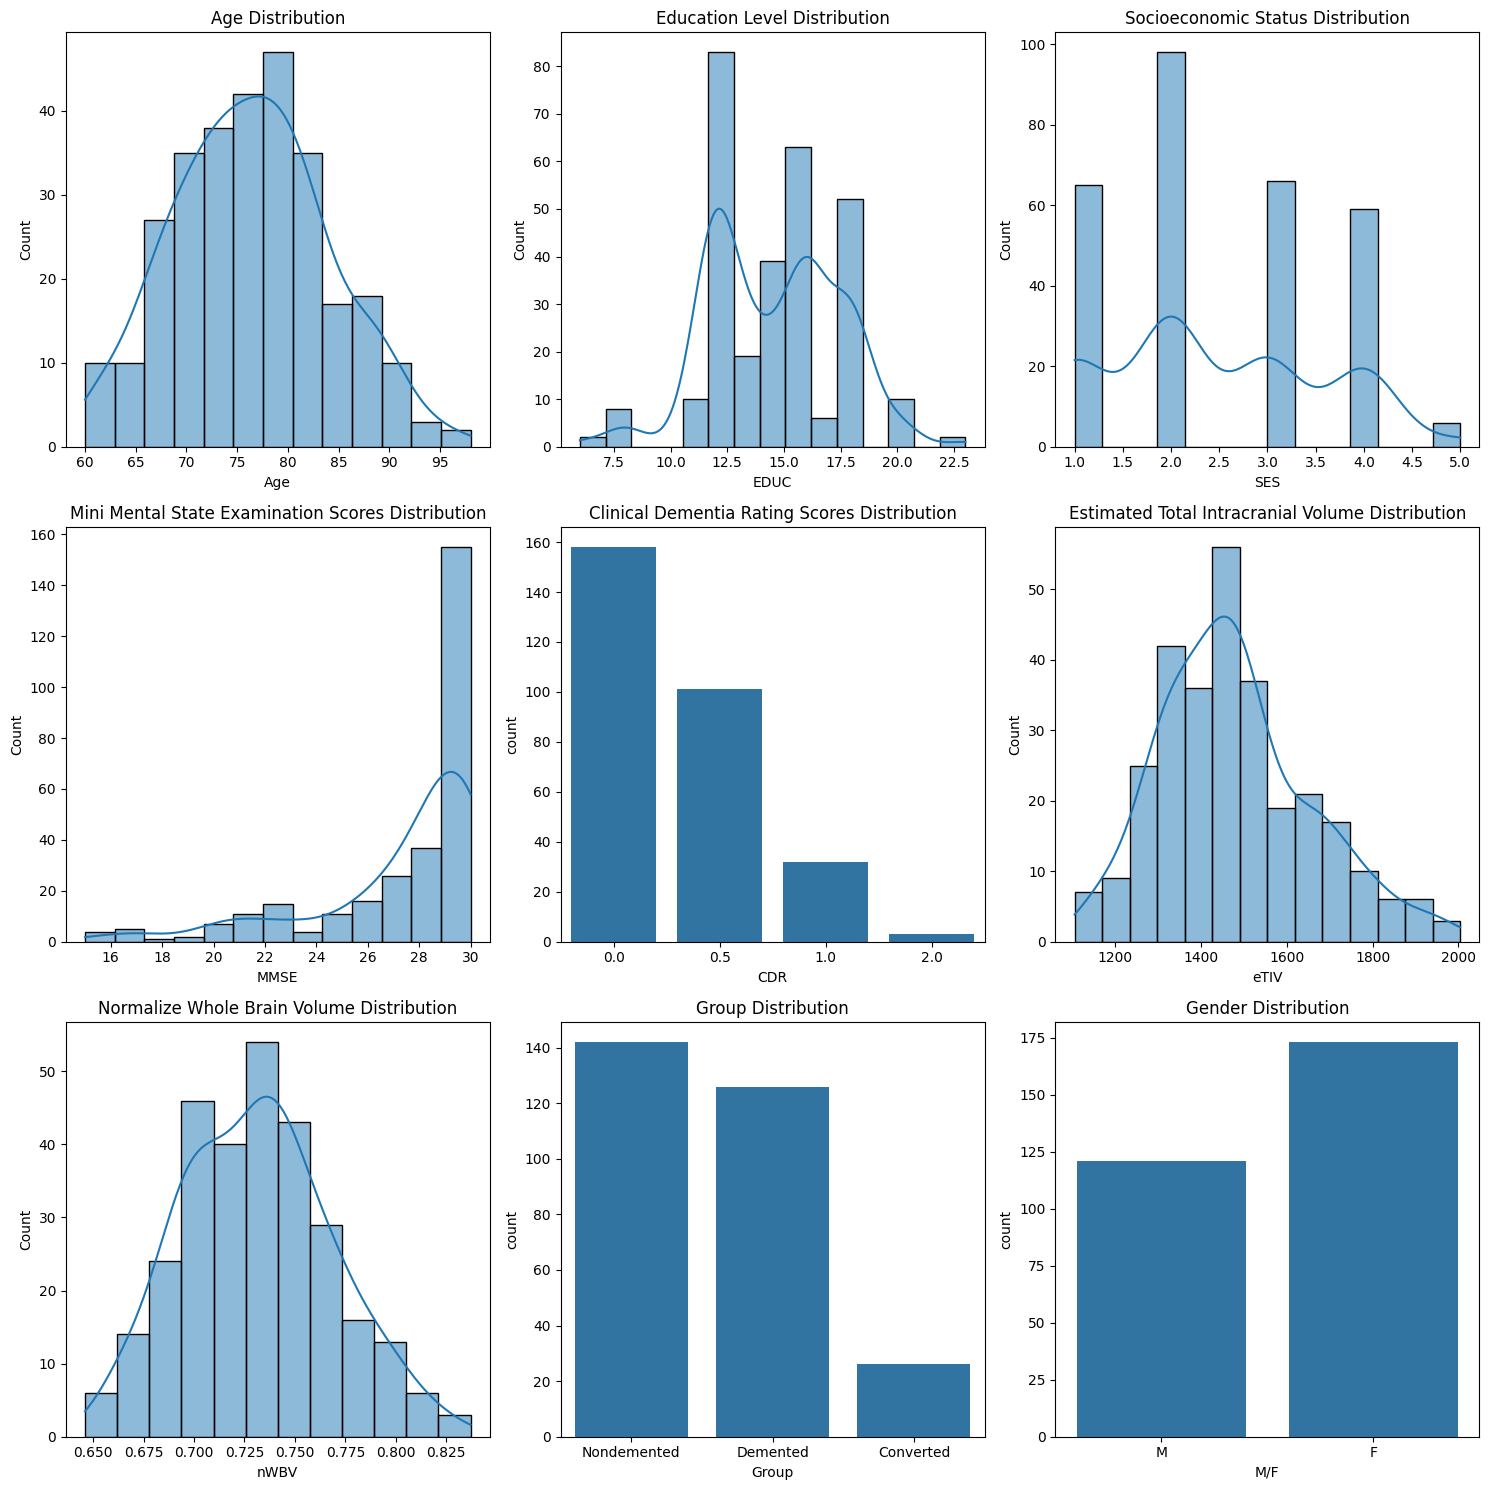

In [7]:
# EDA
title_mapping = {
    'Age': 'Age Distribution',
    'EDUC': 'Education Level Distribution',
    'SES': 'Socioeconomic Status Distribution',
    'MMSE': 'Mini Mental State Examination Scores Distribution',
    'CDR': 'Clinical Dementia Rating Scores Distribution',
    'eTIV': 'Estimated Total Intracranial Volume Distribution',
    'nWBV': 'Normalize Whole Brain Volume Distribution',
    'Group': 'Group Distribution',
    'M/F': 'Gender Distribution'
}

eda_columns = ['Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'Group', 'M/F']

fig = plt.figure(figsize=(15, 15))

# Loop through the selected columns for plotting
for i, column in enumerate(eda_columns):
    plt.subplot(3, 3, i+1)
    if df[column].dtype == 'O' or column == 'CDR':
        sns.countplot(x=df[column])
    else:
        sns.histplot(df[column], kde=True)
    plt.title(title_mapping.get(column, 'Distribution'))

plt.tight_layout()
plt.show()

In [8]:
# Conduct mixed ANOVA for brain volume metric (nWBV)
aov_nwbv = pg.mixed_anova(dv='nWBV', within='Visit', between='Group', subject='Subject ID', data=df)
pg.print_table(aov_nwbv)


ANOVA SUMMARY

Source          SS    DF1    DF2     MS       F    p-unc    np2      eps
-----------  -----  -----  -----  -----  ------  -------  -----  -------
Group        0.034      2    141  0.017   6.712    0.002  0.087  nan
Visit        0.007      1    141  0.007  94.251    0.000  0.401    1.000
Interaction  0.000      2    141  0.000   1.534    0.219  0.021  nan



In [9]:
#post hoc tests: paired t-tests with FDR-BH corrections
posthocs = pg.pairwise_ttests(dv='nWBV', within='Visit', between='Group', subject='Subject ID', data=df, padjust='bonf')
pg.print_table(posthocs)

/usr/local/lib/python3.10/dist-packages/pingouin/pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)



POST HOC TESTS

Contrast       Visit    A          B            Paired    Parametric         T      dof  alternative      p-unc    p-corr  p-adjust                   BF10    hedges
-------------  -------  ---------  -----------  --------  ------------  ------  -------  -------------  -------  --------  ----------  -------------------  --------
Visit          -        1          2            True      True           9.672  143.000  two-sided        0.000   nan      nan         225800000000000.000     0.255
Group          -        Converted  Demented     False     True           1.401   14.676  two-sided        0.182     0.546  bonf                      0.668     0.469
Group          -        Converted  Nondemented  False     True          -0.648   15.832  two-sided        0.527     1.000  bonf                      0.361    -0.188
Group          -        Demented   Nondemented  False     True          -3.690  129.436  two-sided        0.000     0.001  bonf                     75.094    

In [10]:
# Conduct mixed ANOVA for cognitive function (MMSE)
aov_mmse = pg.mixed_anova(dv='MMSE', within='Visit', between='Group', subject='Subject ID', data=df)
pg.print_table(aov_mmse)


ANOVA SUMMARY

Source             SS    DF1    DF2       MS       F    p-unc    np2      eps
-----------  --------  -----  -----  -------  ------  -------  -----  -------
Group        1313.469      2    141  656.735  55.470    0.000  0.440  nan
Visit          20.587      1    141   20.587   8.033    0.005  0.054    1.000
Interaction    15.549      2    141    7.774   3.033    0.051  0.041  nan



In [11]:
# Proceed with post-hoc tests
posthocs = pg.pairwise_ttests(dv='MMSE', within='Visit', between='Group', subject='Subject ID', data=df, padjust='bonf')
pg.print_table(posthocs)


POST HOC TESTS

Contrast       Visit    A          B            Paired    Parametric         T      dof  alternative      p-unc    p-corr  p-adjust                  BF10    hedges
-------------  -------  ---------  -----------  --------  ------------  ------  -------  -------------  -------  --------  ----------  ------------------  --------
Visit          -        1          2            True      True           2.795  143.000  two-sided        0.006   nan      nan                      3.872     0.156
Group          -        Converted  Demented     False     True           6.710   50.636  two-sided        0.000     0.000  bonf               1911000.000     1.157
Group          -        Converted  Nondemented  False     True          -1.303   12.315  two-sided        0.216     0.649  bonf                     0.599    -0.584
Group          -        Demented   Nondemented  False     True          -9.458   65.491  two-sided        0.000     0.000  bonf        24630000000000.000    -1.735

/usr/local/lib/python3.10/dist-packages/pingouin/pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)


In [12]:
aov_etiv = pg.mixed_anova(dv='eTIV', within='Visit', between='Group', subject='Subject ID', data=df)
pg.print_table(aov_etiv)


ANOVA SUMMARY

Source              SS    DF1    DF2         MS      F    p-unc    np2      eps
-----------  ---------  -----  -----  ---------  -----  -------  -----  -------
Group        37424.708      2    141  18712.354  0.297    0.743  0.004  nan
Visit         5573.920      1    141   5573.920  9.225    0.003  0.061    1.000
Interaction   1004.783      2    141    502.392  0.831    0.438  0.012  nan



In [13]:
# Proceed with post-hoc
posthocs = pg.pairwise_ttests(dv='eTIV', within='Visit', between='Group', subject='Subject ID', data=df, padjust='bonf')
pg.print_table(posthocs)


POST HOC TESTS

Contrast       Visit    A          B            Paired    Parametric         T      dof  alternative      p-unc    p-corr  p-adjust      BF10    hedges
-------------  -------  ---------  -----------  --------  ------------  ------  -------  -------------  -------  --------  ----------  ------  --------
Visit          -        1          2            True      True          -3.041  143.000  two-sided        0.003   nan      nan          7.532    -0.049
Group          -        Converted  Demented     False     True          -0.897   17.630  two-sided        0.382     1.000  bonf         0.423    -0.249
Group          -        Converted  Nondemented  False     True          -0.796   17.491  two-sided        0.437     1.000  bonf         0.393    -0.210
Group          -        Demented   Nondemented  False     True           0.159  129.303  two-sided        0.874     1.000  bonf         0.189     0.027
Visit * Group  1        Converted  Demented     False     True         

/usr/local/lib/python3.10/dist-packages/pingouin/pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)


In [14]:
import scipy.stats
import statsmodels.stats.power as smp
import matplotlib.pyplot as plt

# calculate the power directly
power_analysis = smp.TTestIndPower()
# Given effect size
effect_size = 0.7
# Significance level
alpha = 0.05
power = 0.91
sample_size_needed = power_analysis.solve_power(effect_size=effect_size, power=power, alpha=alpha, ratio=1, alternative='two-sided')
print(f"Sample size needed (per group): {sample_size_needed:.2f}")

Sample size needed (per group): 45.45


<Figure size 1000x600 with 0 Axes>

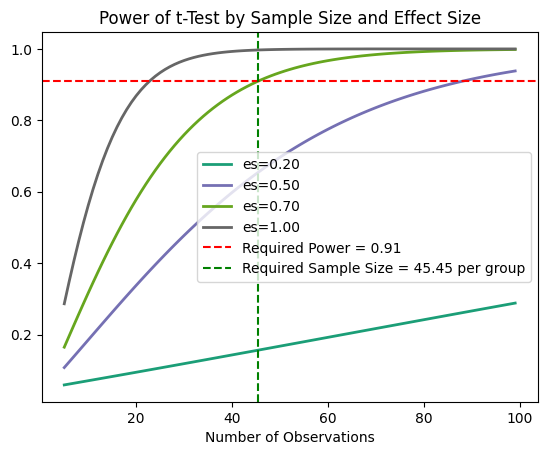

In [15]:
import numpy as np
# Generate a range of values for effect size and sample sizes for the plot
effect_sizes = np.array([0.2, 0.5, 0.7, 1.0])
sample_sizes = np.array(range(5, 100))
# power analysis varying parameters
plt.figure(figsize=(10, 6))
power_analysis.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes)
plt.title('Power of t-Test by Sample Size and Effect Size')
plt.axhline(y=0.91, color='red', linestyle='--', label=f'Required Power = {power}')
plt.axvline(x=sample_size_needed, color='green', linestyle='--', label=f'Required Sample Size = {sample_size_needed:.2f} per group')
plt.legend()
plt.show()